# Анализ и прогнозирование неоднородных временных рядов, БИ

## НИУ ВШЭ, 2022-23 учебный год

### Домашнее задание №4. Математическая статистика в анализе данных

Задание выполнил(а): Иван Павлович 

### Общая информация

__Дата выдачи:__ 22.11.2022

__Дедлайн:__ 04:00 07.12.2022

### Оценивание и штрафы

Каждое задание оценивается в 4 балла.

Оценка за ДЗ вычисляется по следующей формуле:

$$
s_{\text{stat}} \times 1/2 ,
$$

где $s_{\text{stat}}$  — количество баллов, которое вы набрали в сумме по всем заданиям.

За сдачу домашнего задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 **вторичный** балл в день, но  задержка не может быть больше недели.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/). Необходимо загружать файл с расширением .ipynb (питоновский ноутбук)

Инвайт для подключения к странице курса в системе - указан для каждой группы в нашем телеграмм-канале

### О задании

В данном домашнем задании вы попрактикуетесь в решении реальных бизнес-задач, связанных с анализом данных и применением методов математической статистики в таких задачах. В данном домашнем задании вам, возможно, понадобится больше чем обычно гуглить и читать различные статьи, получая информацию, при чем не только практического, но и теоретического характера. Это ***нормально*** и как раз поможет разобраться вам в материале, через изучение тех или иных вещей самостоятельно в понятном и комфортном для вас темпе.

Обратите внимание, что фактически во всех заданиях вам потребуется написать какой-то текст в виде вывода/результата/итога/какого-то резюме. Пожалуйста, не ленитесь, и пишите выводы ***подробно***, поскольку большая часть баллов будет выставляться именно за выводы, так как в анализе данных именно они имеют ключевое, итоговое значение и результат. Текст выводов/комментариев пишите в отдельных ячейках, используя средства текстового редактора Jupyter Notebook/Google Colab, при необходимости используйте средства *выделения*. Написанные выводы подтверждайте выполненным кодом программы.

При выполненнии заданий в данном домашнем задании нет никаких ограничений на используемые библиотеки и применяемые вами методы, функционал.

### Задание 1


Проанализировать набор данных и ответить на следующие вопросы:

1) Какой % наблюдений выходит за 5 и 95 перцентиль?

2) Какому закону распределения отвечают данные? На основе чего вы так решили?

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

Описание данных:

* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 


*Вместе с ответом на задание приложить код*

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api 
from statsmodels.api import qqplot
import scipy.stats
from scipy.stats import shapiro
from scipy.stats import norm

In [2]:
data = pd.read_csv('test_1_1.csv', delimiter=';')
data.shape


(306839, 2)

In [3]:
data.head()

,Unnamed: 0,metrics
0,1,1
1,2,1
2,3,4
3,4,1
4,5,1


In [125]:
data.describe()

,Unnamed: 0,metrics
count,306839.000000,306839.000000
mean,153420.000000,10.146275
std,88576.933961,22.627378
min,1.000000,1.000000
25%,76710.500000,1.000000
50%,153420.000000,2.000000
75%,230129.500000,7.000000
max,306839.000000,998.000000


In [4]:
np.percentile(data['metrics'],100) - np.percentile(data['metrics'],95)


946.0

In [5]:
np.percentile(data['metrics'],5)

1.0

In [6]:
#https://reviews.tn/ru/wiki/what-is-percentile-in-simple-words/
#https://www.codecamp.ru/blog/percentiles-in-python/

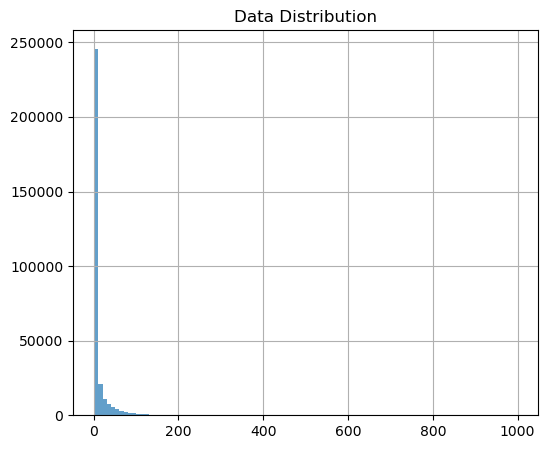

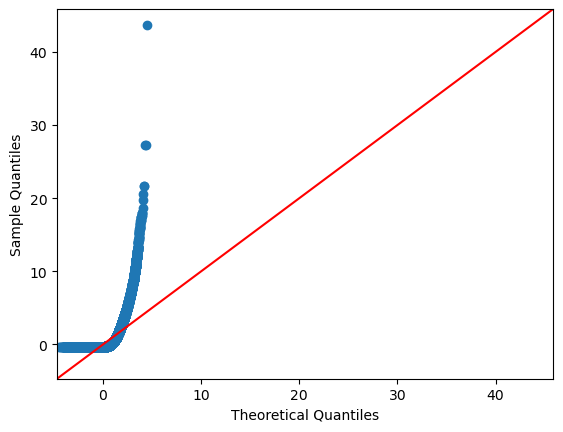

In [7]:
plt.figure(figsize=(6,5))

plt.title('Data Distribution')
data['metrics'].hist(bins=100, alpha=0.7)

plt.show()



fig = qqplot(data['metrics'], norm, line='45', fit=True)

In [8]:
data['metrics'].skew()

5.231829907292705

In [9]:
shapiro(data['metrics'])

/Users/ivanpavlovich/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.4453470706939697, pvalue=0.0)

Очевидно, что распредлеение не нормальное и сильно сдвинутое влево. Графически выглядит, как експоненциальное распредление. Нудно провести стат тесты, например сгенерировать экспонециальное распредельное и сравнить

In [128]:
from numpy.random import exponential

In [199]:
data['sample'] = exponential(10, 306839)

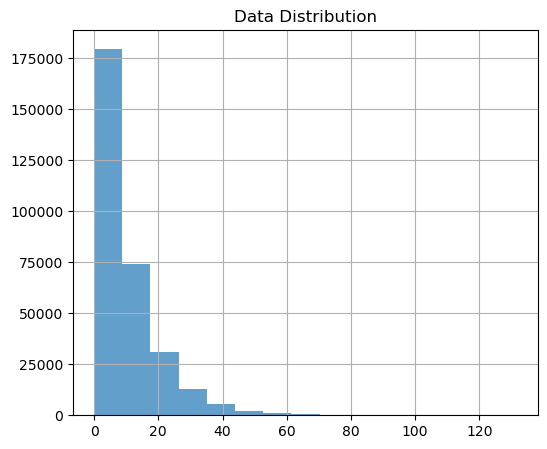

In [200]:
plt.figure(figsize=(6,5))

plt.title('Data Distribution')
data['sample'].hist(bins=15, alpha=0.7)

plt.show()


In [201]:
ttest_ind(data['metrics'],data['sample'])

Ttest_indResult(statistic=3.5903295602331755, pvalue=0.00033028587243365867)

### Задание 2



Определить, можно сравнить две представленные выборки t критерием Стьюдента? 

Если нельзя сравнивать t-критерием, то что будем использовать и почему?

Ответ аргументировать и описать 

[Ссылка на данные](https://drive.google.com/file/d/1blvC6TEBWghhVMexjOdoGEjzhZZh3wSy/view?usp=sharing)

Описание данных: 

* variant -- вариация в А/Б тесте (либо группа А -- например, сайт без изменений. Либо группа Б -- сайт с изменениями)
* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 

*Вместе с ответом на задание приложить код*

In [10]:
data_2 = pd.read_csv('test_1_2.csv', delimiter=';')
data_2.shape



(184204, 3)

In [11]:
data_2.head()

,Unnamed: 0,variant,metrics
0,1,A,1
1,2,B,1
2,3,A,4
3,4,B,37
4,5,B,4


In [12]:
from scipy.stats import levene

#### Проверим 1)Гомогенность и 2) Нормальность распредления 

In [13]:
data_2_A = data_2[data_2['variant']=='A']
data_2_B = data_2[data_2['variant']=='B']

In [14]:
levene(data_2_A['metrics'], data_2_B['metrics'])

LeveneResult(statistic=4.313416821004634, pvalue=0.03781432358426188)

Согласно документации, в критерии Левена, нулевой гипотезой является гипотеза о том, что данные выборки удовлетворяют свойству гомогенности дисперсий.

pvalue этой гипотезы у нас получилось равно 0.037, что соотвествует 3,7%. Это значение меньше уровня значимости, установленного нами в 5%, значит у нас есть основания отвергнуть нулевую гипотезу и считать, что выборка имеет негомогенные дисперсии.

In [15]:
shapiro(data_2_A['metrics'])

/Users/ivanpavlovich/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.4299488663673401, pvalue=0.0)

Согласно документации, в критерии Шапиро-Уилка, нулевой гипотезой является гипотеза о том, что данные выборки распределены нормально.
pvalue этой гипотезы у нас получилось равно 0. Это значение меньше уровня значимости, установленного нами в 5%, значит у нас есть основания отвергнуть нулевую гипотезу и считать, что выборка не имеет ненормальное распределение.

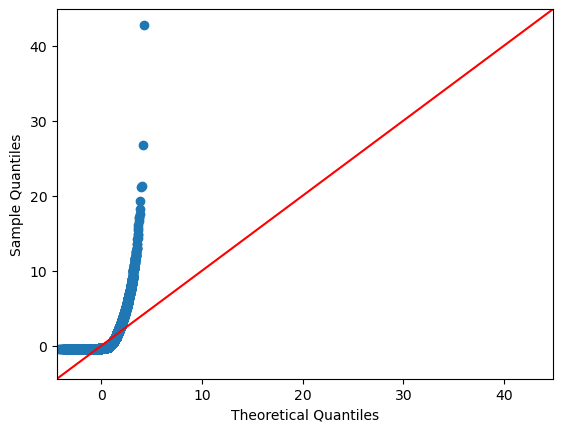

In [16]:
fig = qqplot(data_2_A['metrics'], norm, line='45', fit=True)

In [17]:
shapiro(data_2_B['metrics'])

ShapiroResult(statistic=0.45065927505493164, pvalue=0.0)

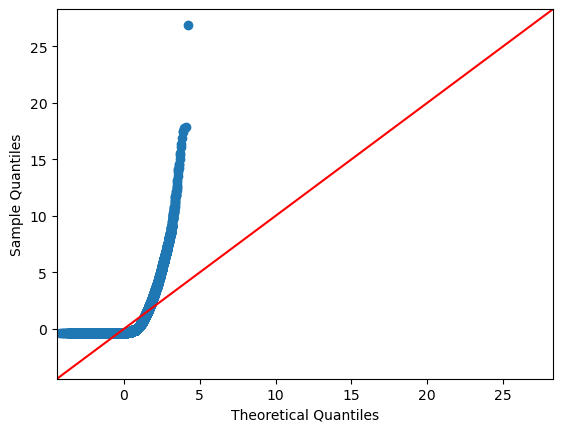

In [18]:
fig = qqplot(data_2_B['metrics'], norm, line='45', fit=True)

###### По QQ графику очевидно, что ни одно из распределний не нормальное.

##### t-тест мы использовать не можем, т.к. не выполняются требования к данным.  

Для применения t-критерия Стьюдента данные должны удовлетворять следующим условиям:
- **несвязные выборки**:
    1. Гомогенность дисперсий - дисперсии внутри наших групп должны быть приблизительно одинаковыми
    2. Нормальность распределения (особенно важно для выборок с количеством наблюдений меньше 30)
    
    
- **связные выборки**:
    1. Нормальность распределения (особенно важно для выборок с количеством наблюдений меньше 30)
  
  
##### Используем z тест, так как на него не влияет гамагоенность и связность 
Z-тест - это любой статистический тест, для которого распределение тестовой статистики в соответствии с нулевой гипотезой может быть аппроксимировано нормальным распределением

### Задание 3



Дано две выборки по А/Б тесту.

Две выборки несбалансированные - кол-во пользователей в каждой группе разные.

Метрика, которую меряем в эксперименте (и которую используем для определения группы, которая лучше себя показала) - кол-во просмотренных страниц на пользователя 

Как вы будете принимать решение, какая группа лучше А или Б, и какие статистические методы (критерии) вы будете использовать, какие преобразования к данным применять? P.S. Если идеи не приходят в голову, возможно, вам может помочь почитать дополнительно про А/Б тесты и работу с несбалансированными выборками

[Ссылка на данные](https://drive.google.com/file/d/1_g7Dw7-8QzTS47D6GNKMb0FzqMAWBDba/view?usp=sharing)

Описание данных: 

* variant -- вариация в А/Б тесте (либо группа А -- например, сайт без изменений. Либо группа Б -- сайт с изменениями)
* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 


*Вместе с ответом на задание приложить код*

Приницпиально, что бы не суложнять задачу мощностями итд, можно использовать несколько метода:

 1. Возьмем меньшую группу и продублируем ее показтели, прибозительно сравняв кол-во участников.Очевино, что распредлению по группам просиходит по определнным криеряим(видел сайт/не видел;активный пользователь/не активный) => участников групп можно характеризовать(кластериелизовать так раз на две группы) и выявить опредленный тренд => Резльтаты в одной гурппе с N участниками, будут приблизетельно харакетирозвоать группу с 6*N. 
 
 2. Оценить эти данные графически. 
    

In [19]:
data_3 = pd.read_csv('test_1_3.csv', delimiter=';')
data_3.shape

(108099, 3)

In [20]:
data_3.head()

,Unnamed: 0,variant,metrics
0,1,A,1
1,2,A,4
2,3,A,15
3,4,A,1
4,5,A,10


In [21]:
data_3['variant'].value_counts()

A    92686
D    15413
Name: variant, dtype: int64

In [22]:
data_3_A = data_3[data_3['variant']=='A']
data_3_D = data_3[data_3['variant']=='D']

In [23]:
data_3_D_Increased = pd.concat([data_3_D,data_3_D])

In [24]:
data_3_D_Increased  = pd.concat([data_3_D_Increased ,data_3_D_Increased ])

In [25]:
data_3_D_Increased  = pd.concat([data_3_D_Increased ,data_3_D])

In [26]:
data_3_D_Increased  = pd.concat([data_3_D_Increased ,data_3_D])

In [27]:
data_3_A['metrics'].sum()

936088

In [28]:
data_3_D_Increased['metrics'].sum()

919452

In [29]:
data_3_A['metrics'].describe()

count    92686.000000
mean        10.099562
std         23.130148
min          1.000000
25%          1.000000
50%          2.000000
75%          7.000000
max        998.000000
Name: metrics, dtype: float64

In [30]:
data_3_D_Increased['metrics'].describe()

count    92478.000000
mean         9.942386
std         21.802158
min          1.000000
25%          1.000000
50%          2.000000
75%          7.000000
max        406.000000
Name: metrics, dtype: float64

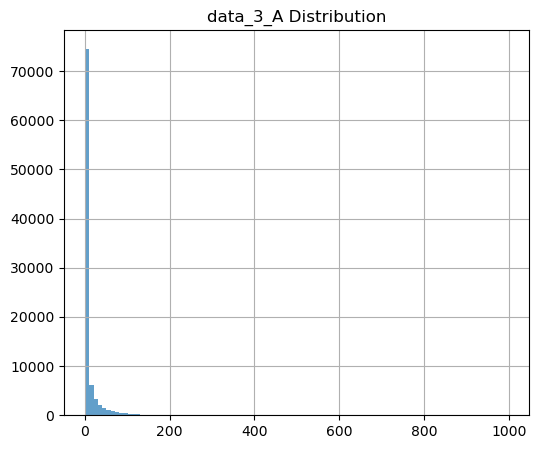

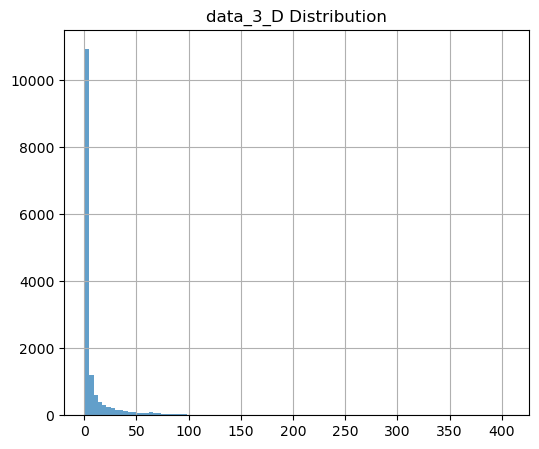

In [31]:
plt.figure(figsize=(6,5))

plt.title('data_3_A Distribution')
data_3_A['metrics'].hist(bins=100, alpha=0.7)


plt.figure(figsize=(6,5))

plt.title('data_3_D Distribution')
data_3_D['metrics'].hist(bins=100, alpha=0.7)


plt.show()

### Вывод

По графическим данным видно, что распределения очень похожи, но на разных числовых интервлах. Когда мы сбалансирвоали выборки, данные из data_3_D_Increased действительно были близки к данным группе А, но все таки, если смотреть на среднее занчение метрики, то в А оно выше, чем в D_Incresed: 10.1 и 9.9 соотвевнно. В нашем случае, метрика это кол-во кликов => чем большую активность показал участник, тем лучше, а значит можно сказать, что данные группы очень похожи, но все таки группа А показала лучший результат. 

### Задание 4



Есть данные с большой дисперсии у метрики (диспресию метрики можно посчитать для каждой группы). Для их дальнейшего анализа дисперсию необходимо сократить. Как определить, что дисперсия действительно большая? Если она большая, как вы будете ее чистить? Ответ аргументировать и описать.  P.S. Если идеи не приходят в голову, возможно, вам может помочь почитать дополнительно про А/Б тесты и снижение дисперсии в них

Описание данных: 

* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

*Вместе с ответом на задание приложить код*

In [32]:
data_4 = pd.read_csv('test_1_1.csv', delimiter=';')

In [46]:
std = np.var(data_4['metrics'])

In [47]:
std

511.99656406368365

Очевидно, что 511 это супер мега много для дисперсии 

In [58]:
datanorm_4 = np.log(data_4['metrics'])

In [59]:
datanorm_4

0         0.000000
1         0.000000
2         1.386294
3         0.000000
4         0.000000
            ...   
306834    2.079442
306835    2.397895
306836    0.000000
306837    4.394449
306838    0.000000
Name: metrics, Length: 306839, dtype: float64

In [61]:
datanorm_4.std()

1.348784084427258

### Задание 5



Есть эксперимент с поисковыми подсказками. Вы хотите узнать, как изменился CTR в каждой группе эксперимента.

**Данные**

- id - уникальный идентификатор пользователя
- action - кол-во сгенерированных поисковых подсказах
- view - кол-во просмотров на одну сессию
- variant - вариант a/b теста, где 0 - это версия "A", 1 -  версия "B".

**Задача**

- сформировать метрику для оценки эксперимента
- подобрать критерий под особенности данных
- сделать вывод о значимости эффекта

**Данные** 

[Ссылка на данные](https://www.dropbox.com/s/fdki267uilkfq7l/task5.csv)

In [92]:
data_5 = pd.read_csv('task5.csv', delimiter=',')

Метрика эффективность показывает отношение просмоторов(результат) к числу подсказок(действиям). Она меняется от 1 до 17, и соответсвенно, чем больше резльтат и чем меньше действий, тем выше эффективность.

In [105]:
data_5['efficiency'] = data_5['view']/data_5['action']

In [106]:
data_5

,id,variant,view,action,efficiency
0,88258,A,10,2,5.00
1,109938,A,3,1,3.00
2,117644,A,7,5,1.40
3,374080,A,9,9,1.00
4,662082,A,1,1,1.00
...,...,...,...,...,...
8186,7706713,B,1,1,1.00
8187,7875223,B,1,1,1.00
8188,4617329,B,9,4,2.25
8189,5394863,B,5,1,5.00


In [107]:
data_5_A = data_5[data_5['variant']=='A']
data_5_B = data_5[data_5['variant']=='B']

In [108]:
data_5['view'].corr(data_5['action'])

0.7458123577804798

Исходим из того, что есть зависмость между action и view 

In [109]:
ttest_ind(data_5_A['view'],data_5_B['view'])

Ttest_indResult(statistic=-1.3120006614733435, pvalue=0.18955668763428124)

In [110]:
ttest_ind(data_5_A['action'],data_5_B['action'])

Ttest_indResult(statistic=-0.9592871306122529, pvalue=0.3374424380669818)

Два варината имеют различия, следовательно можем продолжить 

In [111]:
data_5_A['view'].describe()

count    4646.000000
mean        4.369996
std         3.774225
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        22.000000
Name: view, dtype: float64

In [118]:
data_5_B['view'].describe()

count    3545.000000
mean        4.480395
std         3.771885
min         1.000000
25%         1.000000
50%         4.000000
75%         8.000000
max        22.000000
Name: view, dtype: float64

Анализируя средение занчения и сдантарное отклоенение можно сказать, что B дает больше просмотров с меньшим разбросом

Используем t-критерий Стьюдента (или t-тест) и оценим различия по придуманной метрике в двух вариантах

In [114]:
from scipy.stats import ttest_ind, ttest_rel
from scipy.stats import t, norm

In [117]:
ttest_ind(data_5_A['efficiency'],data_5_B['efficiency'])

Ttest_indResult(statistic=-1.1805028942204043, pvalue=0.23783454766970524)

In [ ]:
pvalue > 0.05 => отколняем гипотезу об отсутвии различий, и принимаем, что B эффективней

In [124]:
data_5_A['efficiency'].describe()

count    4646.000000
mean        1.867893
std         1.720658
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        15.000000
Name: efficiency, dtype: float64

In [123]:
data_5_B['efficiency'].describe()

count    3545.000000
mean        1.914486
std         1.832287
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: efficiency, dtype: float64

Также видно, что среденее значение эффектвиности B тоже выше => вывод, что эффект действительно значим, т.к. он поднял эффективность action и повысил view 